In [ ]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
# Load the data
url = "https://drive.google.com/file/d/1nirICzuv5k0tMzX0rE4CBRIkL19LdBXL/view?usp=sharing"
reconstructed_url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(reconstructed_url)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Examine Data for Consistency
df.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

In [ ]:
# Check for null values and missing data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Examine attritbutes and target variables

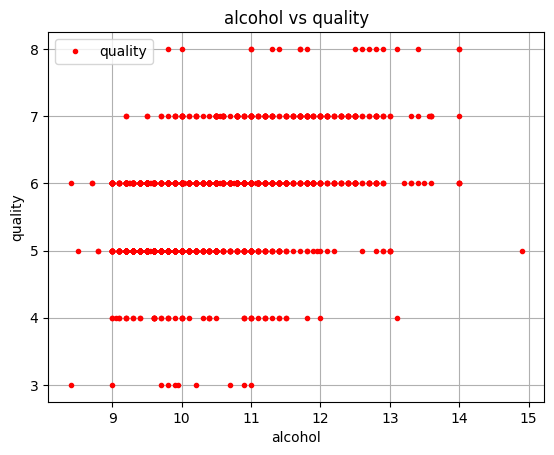

In [ ]:
# Plot various graphs to find quality of wine
df.plot(x='alcohol',y='quality',style='.',color='r')
plt.title('alcohol vs quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.grid()
plt.show()

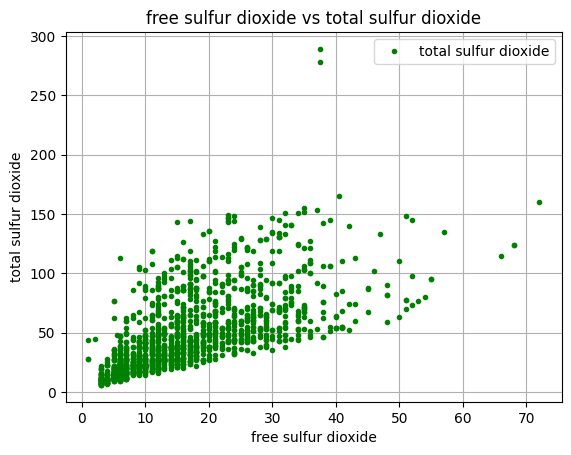

In [ ]:
df.plot(x='free sulfur dioxide',y='total sulfur dioxide', style='.',color='g')
plt.title('free sulfur dioxide vs total sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('total sulfur dioxide')
plt.grid()
plt.show()

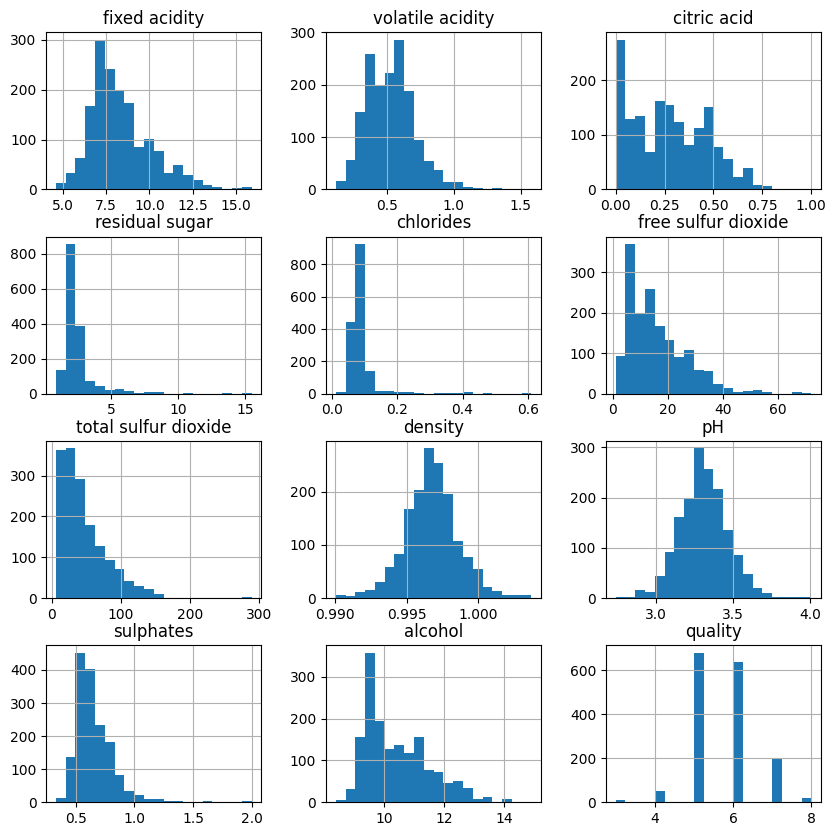

In [ ]:
# Data is easily scattered on features
df.hist(bins=20, figsize=(10, 10))
plt.show()

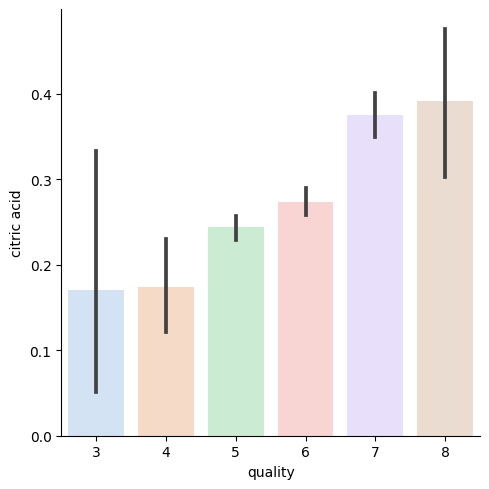

In [ ]:
# Checking which value of citric acid can make changes in quality
sns.catplot(data=df, kind="bar",x="quality",y="citric acid",palette="pastel",alpha=.5, height=5)

<Axes: xlabel='quality', ylabel='citric acid'>

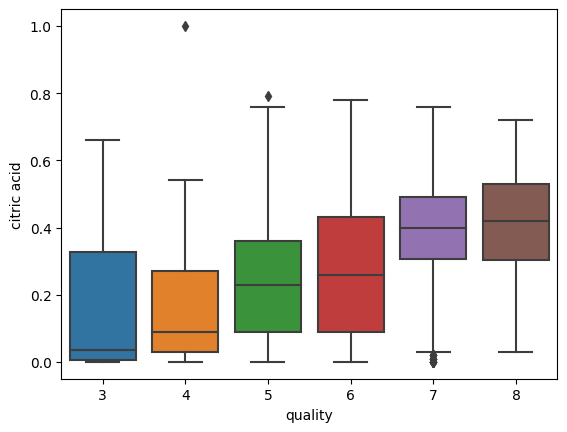

In [ ]:
sns.boxplot(x="quality",y="citric acid",data=df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

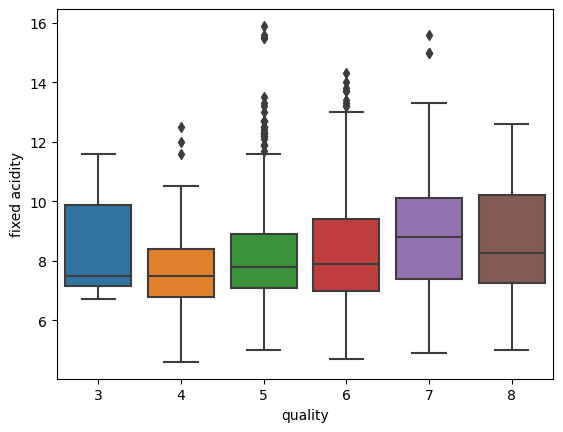

In [ ]:
sns.boxplot(x="quality",y="fixed acidity",data=df)

<Axes: >

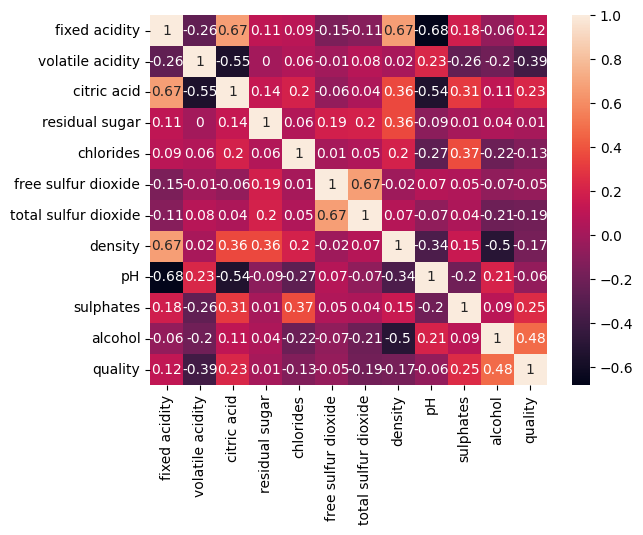

In [ ]:
# Observe correlation matrix
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
# Define X and Y
df['winequality']=[1 if x>=6 else 0 for x in df['quality']]
X=df.drop(['quality','winequality'],axis = 1)
y=df['winequality']
n = y.shape[0]

# separate the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Scale the data
mm = MinMaxScaler()
fit=mm.fit(X_train)
X_train=fit.transform(X_train)
X_test=fit.transform(X_test)

In [ ]:
# SGDRegressor
# train the model using the training set
max_iter = (int)(np.ceil(10**6 / n))
reg_model = SGDRegressor(max_iter=max_iter)
reg_model.fit(X_train, y_train)

SGDRegressor(max_iter=626)

In [ ]:
# Grid search - this will take about 1 minute.
param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'tol':[1e-10, 1e-3],
    'eta0':[0.001, 0.01]
}

# Hyperparameter Tuning
clf = GridSearchCV(reg_model, param_grid, n_jobs = 8, verbose = 3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(estimator=SGDRegressor(max_iter=626), n_jobs=8,
             param_grid={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06]),
                         'eta0': [0.001, 0.01],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'tol': [1e-10, 0.001]},
             verbose=3)

In [ ]:
print('Best Score: ', clf.best_score_)
print('Best Parameters: ', clf.best_params_)
print("Best Estimator: ",  clf.best_estimator_)

Best Score:  0.2755398115209473
Best Parameters:  {'alpha': 1e-06, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'squared_error', 'penalty': 'l1', 'tol': 1e-10}
Best Estimator:  SGDRegressor(alpha=1e-06, learning_rate='constant', max_iter=626, penalty='l1',
             tol=1e-10)


In [ ]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train_sgd)))
r2 = r2_score(y_train, y_pred_train_sgd)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test_sgd)))
r2 = r2_score(y_test, y_pred_test_sgd)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.4462186461259601
R2 score is 0.1998534189264468


The model performance for testing set
--------------------------------------
RMSE is 0.4438457959813191
R2 score is 0.2075460842829283


In [ ]:
# OLS
# train the model using the training set
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# predict the target variable using the test set and the trained model
y_pred_train = reg_model.predict(X_train)
y_pred_test = reg_model.predict(X_test)

In [ ]:
# model evaluation for training set
rmse = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
r2 = r2_score(y_train, y_pred_train)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
r2 = r2_score(y_test, y_pred_test)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.4196690169462949
R2 score is 0.2922368605235548


The model performance for testing set
--------------------------------------
RMSE is 0.41391007482857384
R2 score is 0.3108372594057751


In [ ]:
# Ordinary Least Square (OLS) Principle
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            winequality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     47.56
Date:                Fri, 29 Sep 2023   Prob (F-statistic):           2.54e-87
Time:                        02:06:43   Log-Likelihood:                -704.28
No. Observations:                1279   AIC:                             1433.
Df Residuals:                    1267   BIC:                             1494.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4726      0.108      4.372      0.0

In [ ]:
ypred = model.predict(x)
rmse = sm.tools.eval_measures.rmse(y_train, ypred)
print(rmse)

0.4196690169462949
